<a href="https://colab.research.google.com/github/Inruizal/skills-introduction-to-github/blob/main/Trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

ruta = "/content/drive/My Drive/Colab Notebooks/Base de datos (100 palabras).csv"
df = pd.read_csv(ruta)

#2. Leer el número de filas y de columnas
print(df.shape)

#3. Mostrar las 10 primeras filas del archivo
print(df.head(10))

(101, 6)
   palabra  longitud  frecuencia categoría_gramatical    idioma  sílabas
0    house         5          36           sustantivo    inglés        1
1    libro         5         392           sustantivo   español        2
2     cane         4          56           sustantivo  italiano        1
3     chat         4         831           sustantivo   francés        1
4   scuola         6        1000           sustantivo  italiano        2
5  teacher         7         311           sustantivo   español        2
6     Baum         4         394           sustantivo    alemán        1
7      mar         3         950           sustantivo   español        1
8   soleil         6         282           sustantivo   francés        2
9    Licht         5         358           sustantivo    alemán        1


In [7]:
#4. Halle el máximo y luego el mínimo valor de la columna "frecuencia"

max_freq = df["frecuencia"].max()
min_freq = df["frecuencia"].min()

print("Máximo valor de frecuencia:", max_freq)
print("Mínimo valor de frecuencia:", min_freq)

Máximo valor de frecuencia: 1002
Mínimo valor de frecuencia: 11


In [8]:
#5. Halle cuántas palabras tienen una frecuencia mayor a quinientos y una longitud mayor a 5.

palabras_filtradas = df[(df["frecuencia"] > 500) & (df["palabra"].str.len() > 5)]
print(palabras_filtradas)

     palabra  longitud  frecuencia categoría_gramatical    idioma  sílabas
4     scuola         6        1000           sustantivo  italiano        2
12    tavolo         6         618           sustantivo  italiano        3
13  finestra         8         868           sustantivo  italiano        3
16    flower         6         829           sustantivo    inglés        2
20  montagne         8         534           sustantivo   francés        2
22   Familie         7         817           sustantivo    alemán        3
28    veloce         6         901             adjetivo  italiano        3
30    clever         6         612             adjetivo    inglés        2
39   gestern         7         951           sustantivo    alemán        2
42    jardin         6         628           sustantivo   francés        2
61   musique         7         999           sustantivo   francés        2
63    lehrer         6         789           sustantivo    alemán        2
65   corazon         7   

In [13]:
#6. Halle cuántos idiomas distintos hay en el archivo y cuántas palabras de cada uno de ellos.

numero_de_idiomas = df["idioma"].count()
print("Número de idiomas distintos:", numero_de_idiomas)

df.groupby("idioma")["palabra"].count()

Número de idiomas distintos: 101


,palabra
idioma,
alemán,24
español,24
francés,21
inglés,12
italiano,20


7) Cree una columna llamada “Tamaño” y que indique una palabra es “larga” si tiene al menos 2 sílabas y una longitud superior a 6 caracteres; en caso contrario, la palabra será "corta”.

In [22]:
def clasificar_palabra(row):
#Define una función clasificar_palabra() que recibe como argumento una fila del DataFrame (row).
    if row["sílabas"] >= 2 and len(row["palabra"]) > 6:
        return "larga"
    else:
        return "corta"

df["Tamaño"] = df.apply(clasificar_palabra, axis=1)
# Aplica la función clasificar_palabra() a cada fila del DataFrame.
# axis=1 indica que la función debe ejecutarse fila por fila.
# El resultado de cada fila se almacena en la nueva columna "Tamaño".

print(df["Tamaño"])

0      corta
1      corta
2      corta
3      corta
4      corta
       ...  
96     corta
97     corta
98     corta
99     larga
100    corta
Name: Tamaño, Length: 101, dtype: object


8) Halle cuál es el idioma con
1. menor número de sustantivos,
2. menor número de adjetivos,
3. mayor número de palabras largas,
4. mayor número de palabras cortas.

In [12]:
#1.
idioma_sustantivos = df[df["categoría_gramatical"] == "sustantivo"].groupby("idioma")["palabra"].count()
print("Idioma con menor número de sustantivos:", idioma_sustantivos.idxmin())

#2.
idioma_adjetivos = df[df["categoría_gramatical"] == "adjetivo"].groupby("idioma")["palabra"].count()
print("Idioma con menor número de adjetivos:", idioma_adjetivos.idxmin())
#3.
idioma_largas = df[df["Tamaño"] == "larga"].groupby("idioma")["palabra"].count()
print("Idioma con mayor número de palabras largas:", idioma_largas.idxmax())
#4.
idioma_cortas = df[df["Tamaño"] == "corta"].groupby("idioma")["palabra"].count()
print("Idioma con mayor número de palabras cortas:", idioma_cortas.idxmax())

Idioma con menor número de sustantivos: inglés
Idioma con menor número de adjetivos: francés
Idioma con mayor número de palabras largas: alemán
Idioma con mayor número de palabras cortas: español


9. Grafique (como gráfico de barras) los datos de los puntos 5 y 6, poniendo el texto de cada
eje y el título de gráfico que corresponda en cada caso. Cambie el color de las barras y
nombre los ejes

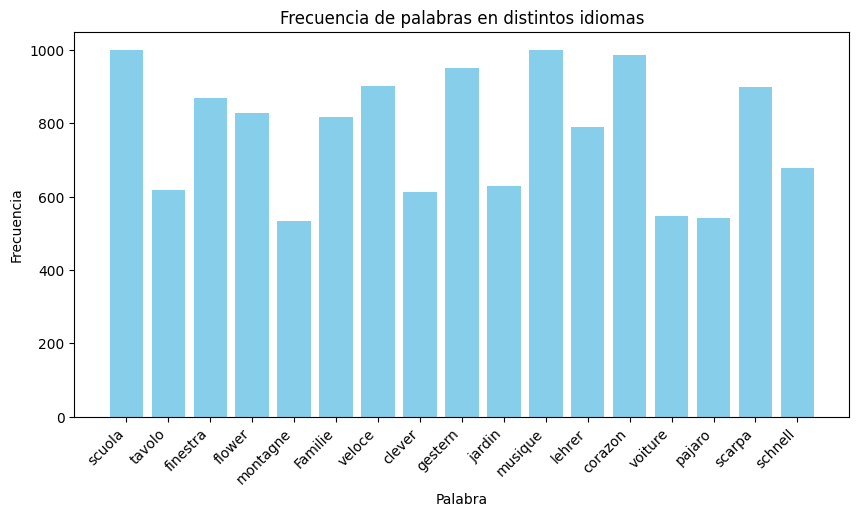

In [14]:
import matplotlib.pyplot as plt

palabras = ["scuola", "tavolo", "finestra", "flower", "montagne", "Familie", "veloce", "clever",
            "gestern", "jardin", "musique", "lehrer", "corazon", "voiture", "pajaro", "scarpa", "schnell"]
frecuencias = [1000, 618, 868, 829, 534, 817, 901, 612, 951, 628, 999, 789, 987, 546, 543, 900, 678]
plt.figure(figsize=(10, 5))
plt.bar(palabras, frecuencias, color='skyblue')
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de palabras en distintos idiomas")
plt.xticks(rotation=45, ha="right")
plt.show()


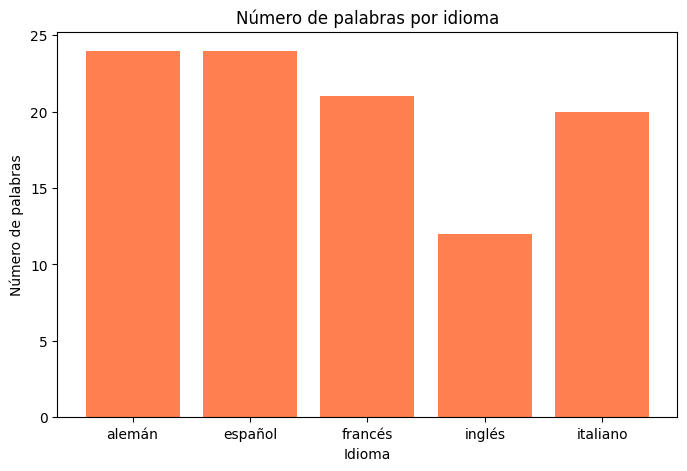

In [15]:
idiomas = ["alemán", "español", "francés", "inglés", "italiano"]
palabras_por_idioma = [24, 24, 21, 12, 20]
plt.figure(figsize=(8, 5))
plt.bar(idiomas, palabras_por_idioma, color='coral')
plt.xlabel("Idioma")
plt.ylabel("Número de palabras")
plt.title("Número de palabras por idioma")
plt.show()

10) Grafique (como el gráfico que considere adecuado) los datos de los puntos 7 (columna
de tamaño) con cualquier de las columnas que considere a su elección. Añada nombre a
los ejes y un título apropiado al gráfico.